In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

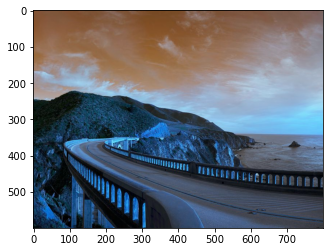

In [2]:
road = cv2.imread("road_image.jpg")
road_copy = np.copy(road)
plt.imshow(road)

In [3]:
road.shape

(600, 800, 3)

In [4]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [5]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [6]:
marker_image.shape

(600, 800)

In [7]:
segments.shape

(600, 800, 3)

In [8]:
from matplotlib import cm

In [9]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
cm.tab10(0)[:3]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [12]:
tuple(np.array(cm.tab10(0)[:3])*255)

(31.0, 119.0, 180.0)

In [13]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [14]:
colors =[]
for i in range(10):
    colors.append(create_rgb(i))

In [15]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [17]:
# Global variables
# COLOR choice
current_marker = 1
# Markers updated by WATERSHED ALGORITHM
marks_upated = False

In [18]:
# Callback function
def mouse_callback(event,x,y,flags,param):
    global marks_upated
    if event == cv2.EVENT_LBUTTONDOWN:
        # Markers passsed to the watershed algo
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        # User sees on the road image
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
        marks_upated = True

In [ ]:
# While True
cv2.namedWindow(winname='Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    # Close all windows
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
    # Clearing all the colors press "c" key
    elif cv2.waitKey(1) & 0xFF == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # Update color choice
    
    
    
cv2.destroyAllWindows()